In [1]:
!nvidia-smi

Tue May 18 07:54:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%ls

sample_data/


#Keras RetinaNet setup
importing the git repository

In [2]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (4201/4201), done.


upgrade keras to latest update

In [3]:
!pip install keras==2.4

     |████████████████████████████████| 174kB 11.2MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [4]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168016 sha256=3218bc03840c39167945db84e7f8fbbf661925e78a5dc0a340850ec21b250443
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=f46fb5bd8172355ff12f4d9a0d4f32f91bde19901ad82cdcd761b08bd4bea5b3
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


setup the model

In [5]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -

In [6]:
!pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4MB 38kB/s 
     |████████████████████████████████| 20.1MB 1.5MB/s 
     |████████████████████████████████| 460kB 43.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [7]:
!pip install gdown

Usefull libraries

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print("Setup ready")



Setup ready


Upload dataset into a pands dataframe

In [9]:
!gdown --id 1mOK2qtcY9oNiAhWbOgvj4v8e9FuqcGIB 

Downloading...
From: https://drive.google.com/uc?id=1mOK2qtcY9oNiAhWbOgvj4v8e9FuqcGIB
To: /content/keras-retinanet/imgs.zip
935MB [00:06, 151MB/s]


In [10]:
!unzip imgs.zip

Archive:  imgs.zip
   creating: imgs/test/
  inflating: imgs/test/bookstore_video1_10020.jpg  
  inflating: imgs/test/bookstore_video1_10050.jpg  
  inflating: imgs/test/bookstore_video1_10080.jpg  
  inflating: imgs/test/bookstore_video1_10110.jpg  
  inflating: imgs/test/bookstore_video1_10140.jpg  
  inflating: imgs/test/bookstore_video1_10170.jpg  
  inflating: imgs/test/bookstore_video1_10200.jpg  
  inflating: imgs/test/bookstore_video1_10230.jpg  
  inflating: imgs/test/bookstore_video1_10260.jpg  
  inflating: imgs/test/bookstore_video1_10290.jpg  
  inflating: imgs/test/bookstore_video1_10320.jpg  
  inflating: imgs/test/bookstore_video1_10350.jpg  
  inflating: imgs/test/bookstore_video1_10380.jpg  
  inflating: imgs/test/bookstore_video1_10410.jpg  
  inflating: imgs/test/bookstore_video1_10440.jpg  
  inflating: imgs/test/bookstore_video1_10470.jpg  
  inflating: imgs/test/bookstore_video1_10500.jpg  
  inflating: imgs/test/bookstore_video1_10530.jpg  
  inflating: imgs/tes

In [11]:
%ls
os.makedirs("snapshots", exist_ok=True)
# %cd snapshots
# !gdown --id 1c9AcfRrfprAEH5G6lMuyj3rh6Ss539nT
# %cd ..

build/           images/   keras_retinanet/  requirements.txt  snapshots/
CONTRIBUTORS.md  imgs/     LICENSE           setup.cfg         tests/
examples/        imgs.zip  README.md         setup.py


In [ ]:
%ls

/content/keras-retinanet


In [12]:
%cd snapshots
!gdown --id 1c9AcfRrfprAEH5G6lMuyj3rh6Ss539nT
!gdown --id 1cAFoh22CZXnllzMitNncfYmpeaBgv-_7
%cd ..

/content/keras-retinanet/snapshots
Downloading...
From: https://drive.google.com/uc?id=1c9AcfRrfprAEH5G6lMuyj3rh6Ss539nT
To: /content/keras-retinanet/snapshots/resnet50_coco_best_v2.1.0.h5
153MB [00:02, 65.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cAFoh22CZXnllzMitNncfYmpeaBgv-_7
To: /content/keras-retinanet/snapshots/resnet50_csv_40.h5
438MB [00:02, 147MB/s]
/content/keras-retinanet


In [13]:
df = pd.read_csv('train_annotations.csv')
df.head()

,imgs/train/bookstore_video0_40.jpg,763,899,806,940,Person
0,imgs/train/bookstore_video0_40.jpg,848,174,891,219,Person
1,imgs/train/bookstore_video0_40.jpg,399,999,419,1031,Person
2,imgs/train/bookstore_video0_40.jpg,417,1033,446,1067,Person
3,imgs/train/bookstore_video0_40.jpg,587,976,626,1013,Person
4,imgs/train/bookstore_video0_40.jpg,895,253,949,303,Person


In [14]:
os.makedirs("humans", exist_ok=True)
df2 = pd.DataFrame(df)

In [ ]:
def show_image_objects(image_row):

  img_path = 'imgs/train/bookstore_video0_8880.jpg'
  box = [
    104 , 417, 134, 462
  ]

  image = read_image_bgr(img_path)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  draw_box(draw, box, color=(255, 255, 0))

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

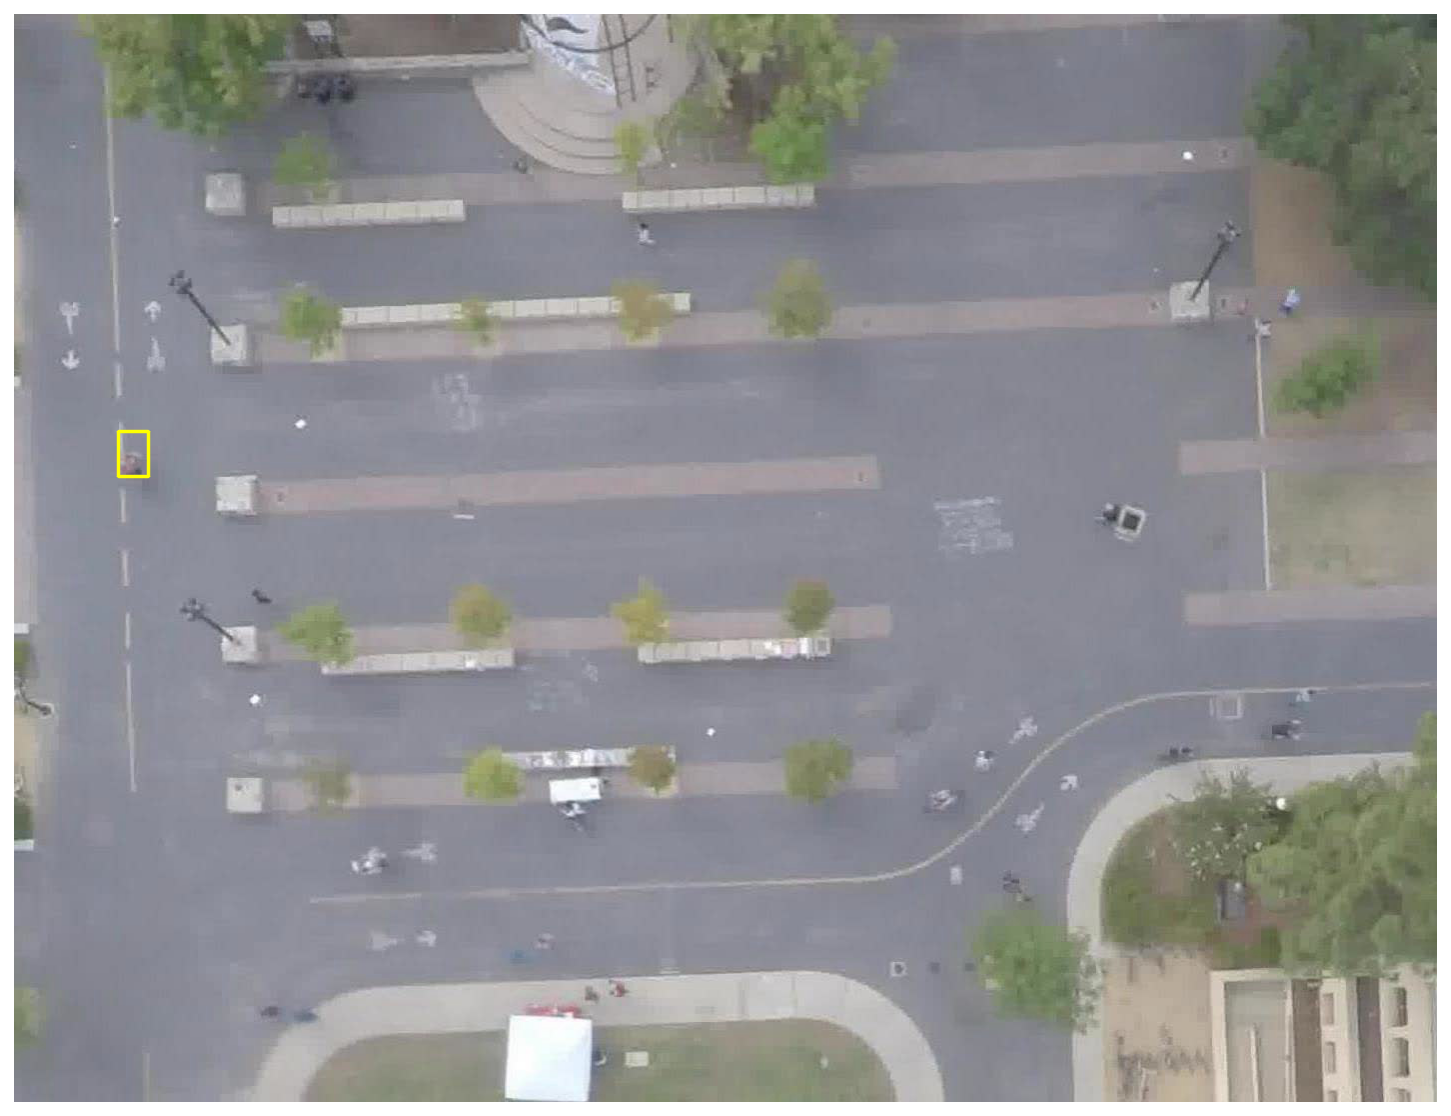

In [ ]:
show_image_objects(df.iloc[0])

#Training phase


In [15]:
train_df, test_df = train_test_split(df2, test_size=0.14, random_state=RANDOM_SEED)
train_df.head()

,imgs/train/bookstore_video0_40.jpg,763,899,806,940,Person
20485,imgs/train/deathCircle_video0_9040.jpg,1193,1160,1238,1213,Biker
8413,imgs/train/bookstore_video3_9560.jpg,804,368,835,424,Person
31368,imgs/train/hyang_video6_1720.jpg,649,197,700,236,Person
21350,imgs/train/deathCircle_video0_10520.jpg,228,466,267,523,Person
9303,imgs/train/bookstore_video3_12840.jpg,1026,802,1092,849,Biker


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='train.csv')  
train_df.to_csv('out.zip', index=False,
          compression=compression_opts)

In [ ]:
!unzip out.zip

Archive:  out.zip
  inflating: train.csv               


In [16]:
ANNOTATIOS_FILE = 'train_annotations.csv'
CLASSES_FILE = 'classes.csv'

train_df.to_csv(ANNOTATIOS_FILE,index=False, header=None)

classes = set(['Person', 'Biker', 'Car', 'Bus'])

with open(CLASSES_FILE, 'w') as f:
	for i, line in enumerate(sorted(classes)):
		f.write('{}, {}\n'.format(line,i))

In [17]:
!head classes.csv

Biker, 0
Bus, 1
Car, 2
Person, 3


In [ ]:
!wc -l train.csv

30682 train.csv


In [18]:
!shuf -o shuffled-file1.csv < train.csv

In [19]:
!keras_retinanet/bin/train.py \
--snapshot snapshots/resnet50_csv_40.h5 \
--initial-epoch 40 \
--epochs 60 \
--steps 645 \
--batch-size 4 \
--config config.ini \
csv shuffled-file1.csv classes.csv 

2021-05-18 07:58:43.572900: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Using TensorFlow backend.
Loading model, this may take a second...
2021-05-18 07:58:45.923875: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-18 07:58:45.982572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-18 07:58:45.983522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-05-18 07:58:45.983602: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.

In [ ]:
!keras_retinanet/bin/train.py \
--snapshot snapshots/resnet50_csv_20.h5 \
--initial-epoch 20 \
--epochs 40 \
--steps 645 \
--batch-size 4 \
--config config.ini \
csv shuffled-file1.csv classes.csv 

2021-05-17 09:05:55.527889: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Using TensorFlow backend.
Loading model, this may take a second...
2021-05-17 09:05:57.317206: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-17 09:05:57.397815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-17 09:05:57.398484: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-17 09:05:57.398526: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so

In [ ]:
!keras_retinanet/bin/train.py \
--epochs 20 \
--steps 645 \
--batch-size 4 \
--config config.ini \
--weights snapshots/resnet50_coco_best_v2.1.0.h5 \
csv shuffled-file1.csv classes.csv 

2021-05-10 12:11:44.097663: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Using TensorFlow backend.
Creating model, this may take a second...
2021-05-10 12:11:45.887571: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-10 12:11:45.921941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-10 12:11:45.922600: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-10 12:11:45.922646: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.s

In [ ]:
list = os.listdir("imgs/train") # dir is your directory path
number_files = len(list)
print(number_files)

2612


Train the RetinaNet using own dataset

#Inference model

In [ ]:
%cd keras-retinanet/

/content/keras-retinanet


In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [21]:
!cp -r /content/keras-retinanet/snapshots/resnet50_csv_60.h5 /content/gdrive/MyDrive/HereIdiot/


In [ ]:
%ls

build/           humans/   keras_retinanet/  setup.cfg   train_annotations.csv
classes.csv      images/   LICENSE           setup.py    val_annotations.csv
CONTRIBUTORS.md  imgs/     README.md         snapshots/
examples/        imgs.zip  requirements.txt  tests/


In [22]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
import tensorflow.keras.backend
# use this to change which GPU to use
# gpu = 0

# # set the modified tf session as backend in keras
# setup_gpu(gpu)


In [23]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

snapshots/resnet50_csv_60.h5


#Compilation of the model

In [24]:
!keras_retinanet/bin/convert_model.py --config config.ini snapshots/resnet50_csv_60.h5 snapshots/inference_20.h5

2021-05-18 10:28:38.308109: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-18 10:28:39.991803: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-18 10:28:40.017905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-18 10:28:40.018889: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-05-18 10:28:40.018942: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-18 10:28:40.021839: I tensorflow/stream_executor/pl

In [25]:
import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu


model_path = os.path.join( 'snapshots', 'inference_20.h5')
model = models.load_model(model_path, backbone_name='resnet50')
# model = models.convert_model(model)
# keras_retinanet.models.backbone('resnet50').retinanet(num_classes=1)
# model.compile(
#     loss={
#         'regression'    : keras_retinanet.losses.smooth_l1(),
#         'classification': keras_retinanet.losses.focal()
#     },
#     optimizer=keras.optimizers.Adam(lr=1e-5, clipnorm=0.001),
#     metrics=['accuracy']
# )

# labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()
labels_to_names ={0: 'Biker', 1: 'Bus', 2: 'Car', 3: 'Person'}
print(labels_to_names)


Using TensorFlow backend.


{0: 'Biker', 1: 'Bus', 2: 'Car', 3: 'Person'}


In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
model = load_model('snapshots/resnet50_csv_50.h5')

NameError: ignored

In [ ]:
import visualkeras
visualkeras.layered_view(model)

TypeError: ignored

#Run model on an image

processing time:  0.10160183906555176


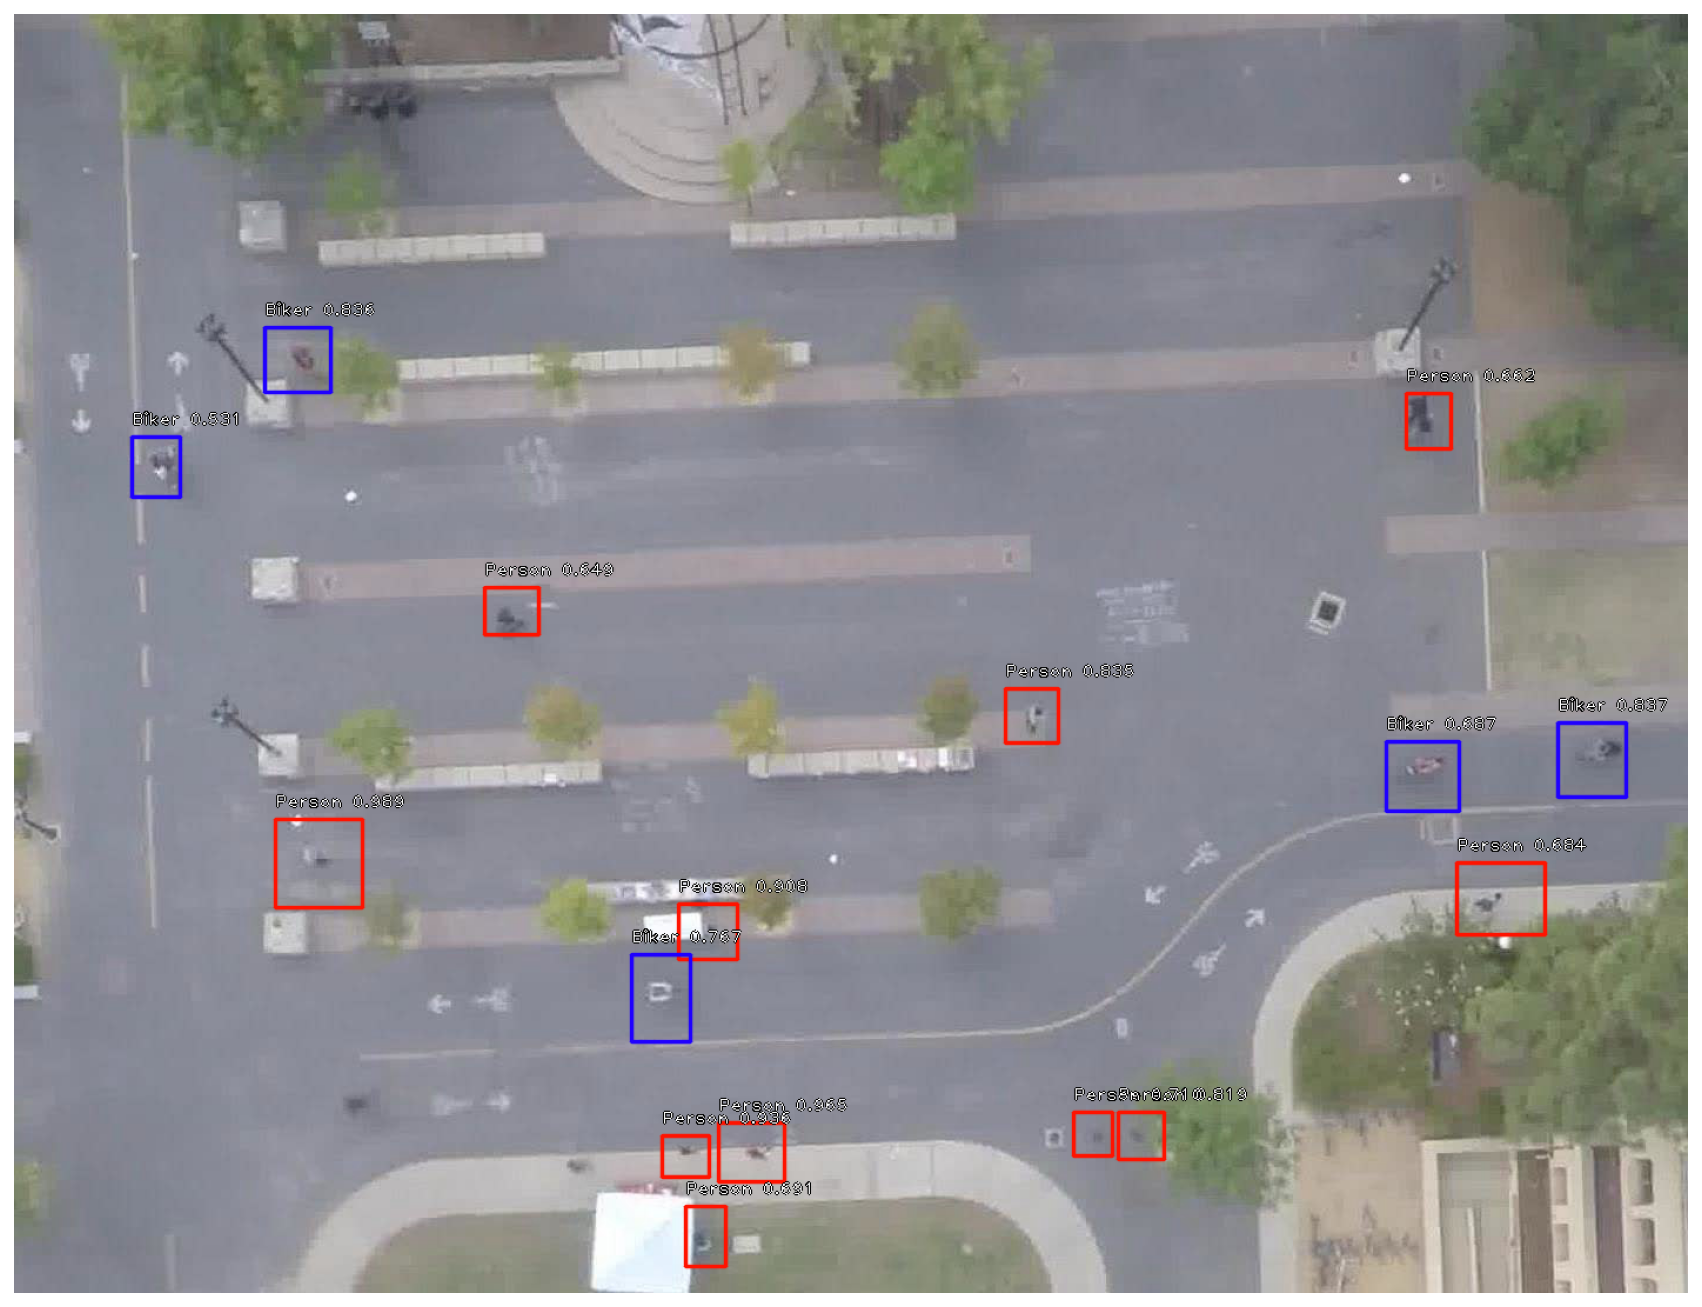

In [113]:
annotations_file = 'test_annotations.csv'
cwd = os.getcwd()

image_names = []

with open (os.path.join(cwd, annotations_file)) as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\n')
    for row in readCSV:
        vals = row[0].split(',')
        this_filepath = vals[0]
        image_names.append(this_filepath)
        
## remove duplicates by taking a set
# imagePaths = list(set(image_names))
# print(len(imagePaths))

LABELS = open('classes.csv').read().strip().split('\n')
LABELS = {int(L.split(",")[1]): L.split(",")[0] for L in LABELS}

# for(i, imagePath) in enumerate(imagePaths):
  
# filename = (imagePath.split(os.path.sep)[-1]).split('.')[0]
# output_file = os.path.sep.join(['humans', '{}.txt'.format(filename)])
# file = open(output_file, 'w')

image = read_image_bgr('imgs/train/bookstore_video0_11600.jpg' )

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
(boxes, scores, labels) = model.predict(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    row = " ".join([LABELS[label], str(score),
                      str(box[1]), str(box[0]), str(box[3]), str(box[2])])
    # file.write("{}\n".format(row))
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
# file.close()
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [135]:
annotations_file = 'split_14_cv.csv'
cwd = os.getcwd()

image_names = []

with open (os.path.join(cwd, annotations_file)) as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\n')
    for row in readCSV:
        vals = row[0].split(',')
        this_filepath = vals[0]
        image_names.append(this_filepath)
        
## remove duplicates by taking a set
image_names = list(set(image_names))
print(len(image_names))

1974


In [136]:
(image_names[:])

['imgs/train/deathCircle_video0_5560.jpg',
 'imgs/train/coupa_video2_1560.jpg',
 'imgs/train/bookstore_video0_8000.jpg',
 'imgs/train/deathCircle_video0_1880.jpg',
 'imgs/train/gates_video3_6560.jpg',
 'imgs/train/hyang_video5_10360.jpg',
 'imgs/train/bookstore_video1_120.jpg',
 'imgs/train/bookstore_video0_4160.jpg',
 'imgs/train/hyang_video6_3360.jpg',
 'imgs/train/deathCircle_video0_5680.jpg',
 'imgs/train/coupa_video2_4160.jpg',
 'imgs/train/coupa_video1_9880.jpg',
 'imgs/train/bookstore_video3_1760.jpg',
 'imgs/train/bookstore_video3_13880.jpg',
 'imgs/train/hyang_video5_8760.jpg',
 'imgs/train/deathCircle_video0_6000.jpg',
 'imgs/train/gates_video4_680.jpg',
 'imgs/train/bookstore_video3_8720.jpg',
 'imgs/train/hyang_video6_7920.jpg',
 'imgs/train/hyang_video6_8360.jpg',
 'imgs/train/coupa_video1_10800.jpg',
 'imgs/train/hyang_video6_3920.jpg',
 'imgs/train/coupa_video2_8400.jpg',
 'imgs/train/hyang_video5_6800.jpg',
 'imgs/train/bookstore_video0_13120.jpg',
 'imgs/train/hyang_vi

In [137]:
score_threshold_retinanet = 0.5
acceptable_box_overlap = 0.3

In [138]:
def get_gt_annotations(filepath):
    gt_ann = []
    with open (os.path.join(cwd, annotations_file)) as csvfile:
        readCSV = csv.reader(csvfile, delimiter='\n')
        for row in readCSV:
            vals = row[0].split(',')
            this_filepath = vals[0]
            
            if this_filepath == filepath:
                record = []
                record.append(int(vals[1]))
                record.append(int(vals[2]))
                record.append(int(vals[3]))
                record.append(int(vals[4]))
                record.append(vals[5])
                
                gt_ann.append(record)
          
        if this_filepath == filepath:
            record = []
            record.append(int(vals[1]))
            record.append(int(vals[2]))
            record.append(int(vals[3]))
            record.append(int(vals[4]))
            record.append(vals[5])
              
            gt_ann.append(record)
    return gt_ann

In [139]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(int(boxA[0]), int(boxB[0]))
	yA = max(int(boxA[1]), int(boxB[1]))
	xB = min(int(boxA[2]), int(boxB[2]))
	yB = min(int(boxA[3]), int(boxB[3]))
 
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
 
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (int(boxA[2]) - int(boxA[0]) + 1) * (int(boxA[3]) - int(boxA[1]) + 1)
	boxBArea = (int(boxB[2]) - int(boxB[0]) + 1) * (int(boxB[3]) - int(boxB[1]) + 1)
 
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
 
	# return the intersection over union value
	return iou

In [140]:
def highest_iou(predicted_box, gt_ann):
    
    highest_iou = 0
    best_match = []
    for each_gt in gt_ann:
        this_iou = bb_intersection_over_union(predicted_box[:-1], each_gt[:-1])
#         print(" For this box is: ", this_iou)
        if this_iou > highest_iou:
            highest_iou = this_iou
            best_match = each_gt
            
    return highest_iou, best_match


In [141]:
def accuracy(gt_ann, predicted_ann):
    true_positive = []
    class_mismatch = []
    false_positive = []
    false_negative = []
    
    predicted_ann_copy = predicted_ann.copy()
    gt_ann_copy = gt_ann.copy()
    
    for each_pred in predicted_ann_copy:
        # 1. Calculate the highest_iou with any gt_box
        best_iou, best_gt_match = highest_iou(each_pred, gt_ann_copy)
#         print("Best IOU is: ", each_pred, best_gt_match, best_iou)
        
        ## If this box has a match
        if best_iou >= acceptable_box_overlap:
            ## if class label matches
            if best_gt_match[-1] == each_pred[-1]:
                ## This is a true positive
                true_positive.append(each_pred)
                ## remove this from predicted ann and gt
#                 print("Predicted Ann before:", predicted_ann)
                predicted_ann.remove(each_pred)
#                 print("Predicted Ann after:", predicted_ann)
                if best_gt_match in gt_ann:
                    gt_ann.remove(best_gt_match)
            elif best_gt_match[-1] != each_pred[-1]:
                ## this is a class mismatch
                class_mismatch.append(each_pred)
                ## remove this box
                predicted_ann.remove(each_pred)
                if best_gt_match in gt_ann:
                    gt_ann.remove(best_gt_match)
        
    ## If IOU is less than 0.5, leave as is

    ## Any predicted box is now false positive
    for remain_pred in predicted_ann:
        false_positive.append(remain_pred)

    ## Any remaining gt box is false negative
    for remain_gt in gt_ann:
        if remain_gt[-1] in ['Biker','Bus', 'Car', 'Person']:
            false_negative.append(remain_gt)

    return true_positive, class_mismatch, false_positive, false_negative

In [142]:
def run_detection_image(filepath):
    image = read_image_bgr(filepath)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale
    
    gt_ann = get_gt_annotations(filepath)
    num_gt_ann = len(gt_ann)
    
    predicted_ann = []

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < score_threshold_retinanet:
            break
        record = []
        record.append(int(box[0]))
        record.append(int(box[1]))
        record.append(int(box[2]))
        record.append(int(box[3]))
        record.append(labels_to_names[label])
        print("Record is: ", record)
        predicted_ann.append(record)
    
    
#     print("predicted ann are: ", predicted_ann)
    ## Calculate boxes
    true_positive, class_mismatch, false_positive, false_negative = accuracy(gt_ann, predicted_ann)
    print(len(true_positive), len(class_mismatch), len(false_positive), len(false_negative))
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    ## Draw theses on the image
    ## Draw true positive in green
    if len(true_positive) > 0:
        for each_true in true_positive:
            cv2.rectangle(draw,(each_true[0],each_true[1]),(each_true[2],each_true[3]),(0,255,0),3) #green
            cv2.putText(draw, each_true[-1], (each_true[0]-2, each_true[1]-2),font, 0.5,
                        (0,0,0),1,cv2.LINE_AA) # text in black
        
    ## Draw class mismatch in light blue   
    if len(class_mismatch) > 0:
        for each_mismatch in class_mismatch:
            cv2.rectangle(draw,(each_mismatch[0],each_mismatch[1]),(each_mismatch[2],each_mismatch[3]),(255,255,0),3) #green
            cv2.putText(draw, each_mismatch[-1], (each_mismatch[0]-2, each_mismatch[1]-2),font, 0.5,
                        (0,0,0),1,cv2.LINE_AA) # text in black
        
    
     ## Draw false positive  in blue 
    if len(false_positive) > 0:
        for each_fp in false_positive:
            cv2.rectangle(draw,(each_fp[0],each_fp[1]),(each_fp[2],each_fp[3]),(255,0,0),3) #green
            cv2.putText(draw, each_fp[-1], (each_fp[0]-2, each_fp[1]-2),font, 0.5,
                        (0,0,0),1,cv2.LINE_AA) # text in black
    
    
     ## Draw false negative in red 
    if len(false_negative) > 0:
        for each_fn in false_negative:
            cv2.rectangle(draw,(each_fn[0],each_fn[1]),(each_fn[2],each_fn[3]),(0,0,255),3) #green
            cv2.putText(draw, each_fn[-1], (each_fn[0]-2, each_fn[1]-2),font, 0.5,
                        (0,0,0),1,cv2.LINE_AA) # text in black
            
            
    ## Add key to the image
    cv2.putText(draw, "True Positive", (1200, 20),font, 0.8, (0,255,0),1,cv2.LINE_AA) 
    cv2.putText(draw, "Class Mismatch", (1200, 50),font, 0.8, (255,255,0),1,cv2.LINE_AA)
    cv2.putText(draw, "False Positive", (1200, 80),font, 0.8, (255,0,0),1,cv2.LINE_AA)
    cv2.putText(draw, "False Negtaive", (1200, 110),font, 0.8, (0,0,2550),1,cv2.LINE_AA)
    
    ### Save this image
    
    file, ext = os.path.splitext(filepath)
    image_name = file.split('/')[-1] + ext
    output_path = os.path.join('examples/results_test/', image_name)
    
    draw_conv = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    cv2.imwrite(output_path, draw_conv)
    
    

    #     color = label_color(label)

    #     b = box.astype(int)
    #     draw_box(draw, b, color=color)

    #     caption = "{} {:.3f}".format(labels_to_names[label], score)
    #     draw_caption(draw, b, caption)

    # plt.figure(figsize=(15, 15))
    # plt.axis('off')
    # plt.imshow(draw)
    # plt.show()
    return len(true_positive), len(class_mismatch), len(false_positive), len(false_negative), num_gt_ann

In [143]:
total_true_positive = 0
total_class_mismatch = 0
total_false_positive = 0
total_false_negative = 0
total_gt = 0

In [144]:
for filepath in image_names:
    print(filepath)
    num_tp, num_cm , num_fp, num_fn, num_gt = run_detection_image(filepath)
    print("Ground Truth: ", num_gt)
    total_true_positive += num_tp
    total_class_mismatch += num_cm
    total_false_positive += num_fp
    total_false_negative += num_fn
    total_gt += num_gt

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Record is:  [229, 824, 339, 896, 'Biker']
Record is:  [1797, 883, 1851, 913, 'Person']
1 0 5 1
Ground Truth:  2
imgs/train/hyang_video5_8800.jpg
processing time:  0.07433724403381348
Record is:  [405, 1576, 449, 1662, 'Person']
Record is:  [434, 1577, 474, 1652, 'Person']
Record is:  [82, 996, 146, 1081, 'Person']
Record is:  [1296, 1016, 1369, 1116, 'Biker']
Record is:  [11, 877, 60, 939, 'Person']
0 0 5 2
Ground Truth:  2
imgs/train/bookstore_video0_11360.jpg
processing time:  0.06771039962768555
Record is:  [974, 412, 1004, 457, 'Person']
Record is:  [841, 574, 885, 618, 'Person']
Record is:  [571, 969, 615, 1016, 'Person']
Record is:  [938, 930, 973, 972, 'Person']
Record is:  [997, 800, 1044, 830, 'Biker']
Record is:  [901, 933, 933, 971, 'Person']
Record is:  [1096, 523, 1133, 574, 'Biker']
Record is:  [122, 520, 156, 561, 'Person']
Record is:  [525, 955, 568, 999, 'Person']
Record is:  [204, 252, 267, 324, 'Biker']
Record is

KeyboardInterrupt: ignored

In [ ]:
print(total_true_positive, total_class_mismatch, total_false_positive, total_false_negative, total_gt)#0.5/0.4

In [ ]:
precision = total_true_positive/(total_true_positive+total_false_positive+total_class_mismatch)

recall = total_true_positive/(total_true_positive+ total_false_negative)

f1_score = 2*(precision * recall)/(precision + recall)

accuracy = (total_true_positive ) / total_gt

print(precision, recall, f1_score,accuracy)#0.5/0.4